# Combine shapefiles, socioecon, growth, and boston_stays

- The mobility data incorporate only a small group of boston metro areas.
- Need to create the intersection. And save the files.



In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
import matplotlib.pyplot as plt
import contextily as ctx
# import utils

In [11]:
# inputs
ma_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2019_25_bg.shp')

nh_shp = gpd.read_file('../../data/01_raw/shapefiles/tl_2019_33_bg.shp')

with open('../../data/02_intermediate/boston_socioecon_2016.pickle', 'rb') as f:
    greater_boston_socioecon_2016_df = pickle.load(f)

with open('../../data/02_intermediate/boston_socioecon_2018.pickle', 'rb') as f:
    greater_boston_socioecon_2018_df = pickle.load(f)

with open('../../data/02_intermediate/boston_annual_growth_2016_2018.pickle', 'rb') as f:
    growth_rate_16_18 = pickle.load(f)
    
with open('../../data/02_intermediate/boston_stays.pickle', 'rb') as f:
    boston_stays_df = pickle.load(f)
    

In [12]:
greater_boston_socioecon_2016_df.index

Index(['250010101001', '250010101002', '250010101003', '250010101004',
       '250010101005', '250010102061', '250010102062', '250010102063',
       '250010102081', '250010102082',
       ...
       '330199758003', '330199758004', '330199758005', '330199759011',
       '330199759012', '330199759013', '330199759021', '330199759022',
       '330199759023', '330199759024'],
      dtype='object', name='full_bg_fips', length=5883)

In [13]:
greater_boston_socioecon_2018_df.index

Index(['250010101001', '250010101002', '250010101003', '250010101004',
       '250010101005', '250010102061', '250010102062', '250010102063',
       '250010102081', '250010102082',
       ...
       '330199758003', '330199758004', '330199758005', '330199759011',
       '330199759012', '330199759013', '330199759021', '330199759022',
       '330199759023', '330199759024'],
      dtype='object', name='full_bg_fips', length=5883)

# Choose CBGs of interest

In [14]:
# geoid in Boston stay 
geoid_of_interest = set(np.unique(boston_stays_df.GEOID)).union(set(np.unique(boston_stays_df.GEOID_home))) 
geoid_of_interest = list(geoid_of_interest.intersection(set(greater_boston_socioecon_2016_df.index))) 
print(len(geoid_of_interest))


3391


In [15]:
# use the geoid of interests
greater_boston_shp = pd.concat([ma_shp, nh_shp], axis = 0)

# get the geoids in boston_stay data
greater_boston_shp = greater_boston_shp.loc[greater_boston_shp['GEOID'].isin(geoid_of_interest), :]
greater_boston_shp = greater_boston_shp.set_index('GEOID')

# get the targeting geoids dfs.
greater_boston_socioecon_2016_v1_df = greater_boston_socioecon_2016_df.loc[geoid_of_interest, :]
greater_boston_socioecon_2018_v1_df = greater_boston_socioecon_2018_df.loc[geoid_of_interest, :]
growth_rate_16_18_v1 = growth_rate_16_18.loc[geoid_of_interest, :]


In [16]:
# sort idx
greater_boston_shp.sort_index(inplace=True)
greater_boston_socioecon_2016_v1_df.sort_index(inplace=True)
greater_boston_socioecon_2018_v1_df.sort_index(inplace=True)
growth_rate_16_18_v1.sort_index(inplace=True)


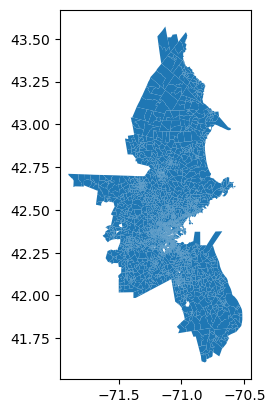

In [17]:
# plot
greater_boston_shp.plot()
plt.show()

In [18]:
# save files.
with open('../../data/03_processed/greater_boston_shp.pickle','wb') as f: 
    pickle.dump(greater_boston_shp, f)

with open('../../data/03_processed/greater_boston_socioecon_2016.pickle', 'wb') as f:
    pickle.dump(greater_boston_socioecon_2016_v1_df, f)
    
with open('../../data/03_processed/greater_boston_socioecon_2018.pickle', 'wb') as f:
    pickle.dump(greater_boston_socioecon_2018_v1_df, f)

with open('../../data/03_processed/greater_boston_annual_growth_2016_2018.pickle', 'wb') as f:
    pickle.dump(growth_rate_16_18_v1, f)
    

In [ ]:
greater_boston_socioecon_2016_v1_df = greater_boston_socioecon_2016_df.loc[geoid_of_interest, :]
greater_boston_socioecon_2018_v1_df = greater_boston_socioecon_2018_df.loc[geoid_of_interest, :]


In [42]:
greater_boston_socioecon_2016_df

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_cycle_ratio,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
full_bg_fips,,,,,,,,,,,,,,,,,,,,,
250010101001,938.0,938.0,534.0,404.0,53.9,552.0,938.0,770.0,0.0,10.0,...,0.067358,0.202073,0.044905,0.326340,0.159674,0.046620,0.277904,0.617271,1.048913,0.528205
250010101002,289.0,289.0,162.0,127.0,63.3,202.0,289.0,237.0,12.0,0.0,...,0.000000,0.213793,0.241379,0.236162,0.118081,0.107011,0.470588,0.501730,0.717822,0.792608
250010101003,755.0,755.0,416.0,339.0,54.9,412.0,755.0,694.0,29.0,0.0,...,0.159420,0.123188,0.130435,0.265276,0.171386,0.032787,0.329912,0.548344,1.004854,0.381381
250010101004,499.0,499.0,225.0,274.0,59.6,300.0,499.0,438.0,9.0,0.0,...,0.000000,0.446541,0.213836,0.281659,0.109170,0.030568,0.550976,0.318637,0.530000,0.652375
250010101005,481.0,481.0,258.0,223.0,57.4,336.0,481.0,378.0,38.0,0.0,...,0.149425,0.260536,0.187739,0.211712,0.058559,0.020270,0.347458,0.542620,0.776786,0.597122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330199759013,1265.0,1265.0,590.0,675.0,49.2,649.0,1265.0,1265.0,0.0,0.0,...,0.000000,0.018692,0.030374,0.064963,0.000000,0.000000,0.555764,0.338340,0.659476,0.248843
330199759021,724.0,724.0,315.0,409.0,33.0,312.0,724.0,627.0,71.0,0.0,...,0.000000,0.274566,0.046243,0.150812,0.023202,0.000000,0.340866,0.477901,1.108974,0.187500
330199759022,987.0,987.0,490.0,497.0,41.8,440.0,987.0,976.0,0.0,0.0,...,0.000000,0.117302,0.032258,0.127695,0.041459,0.000000,0.428120,0.345491,0.775000,0.150579


In [45]:
greater_boston_socioecon_2016_df.loc[list(geoid_of_interest), :]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['330159800111', '250259811002', '250259815011', '250259812011',\n       '250259811001',\n       ...\n       '250259817001', '250259901010', '250099901000', '250259807001',\n       '250259816001'],\n      dtype='object', name='full_bg_fips', length=13). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [47]:
geoid_of_interest

{'330159800111',
 '250092232002',
 '250092522022',
 '250214226002',
 '250251201043',
 '250251601012',
 '250092107004',
 '250251101032',
 '250250203021',
 '250092171003',
 '250235251012',
 '250173313001',
 '250214035003',
 '250092542002',
 '250173621001',
 '330150500001',
 '250092221002',
 '250092231002',
 '250250004011',
 '250092066002',
 '250235212012',
 '250235241012',
 '250250105002',
 '250173104003',
 '250173351005',
 '250214162001',
 '250214194002',
 '250214173001',
 '250173336002',
 '250173837003',
 '250214431023',
 '250173591001',
 '250173701024',
 '250173883001',
 '250173372021',
 '330150038021',
 '250214203021',
 '250214176012',
 '250259811002',
 '250173536005',
 '250251304043',
 '250235114001',
 '250235612001',
 '250250007043',
 '330150036021',
 '250173381001',
 '250173352004',
 '250214197001',
 '250173120002',
 '250173155004',
 '250173871001',
 '250251104034',
 '330150650013',
 '250173354004',
 '250173344001',
 '250250612001',
 '250173371023',
 '250173383002',
 '250235442004

In [46]:
growth_rate_16_18.loc[geoid_of_interest, :]


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['330159800111', '250259811002', '250259815011', '250259812011',\n       '250259811001',\n       ...\n       '250259817001', '250259901010', '250099901000', '250259807001',\n       '250259816001'],\n      dtype='object', name='full_bg_fips', length=13). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

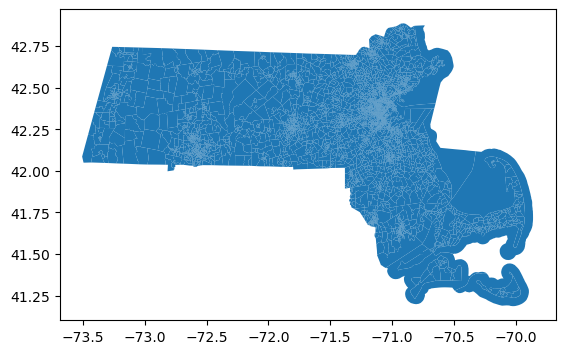

In [20]:
ma_shp.plot()
plt.show()

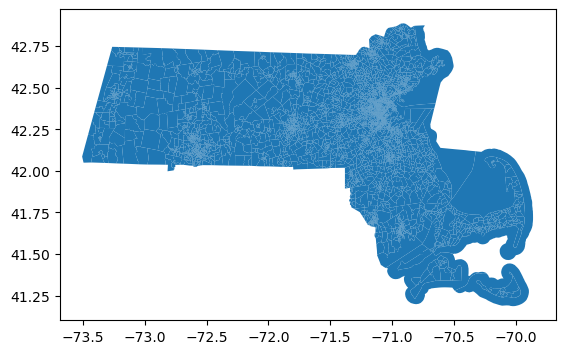

In [17]:
fig, ax = plt.subplots(1, 1)
ma_shp.plot(ax = ax)
plt.show()

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
dir(gpd)

['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_decorator',
 '_vectorized',
 '_version',
 'array',
 'base',
 'clip',
 'datasets',
 'explore',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_feather',
 'read_file',
 'read_parquet',
 'read_postgis',
 'show_versions',
 'sindex',
 'sjoin',
 'sjoin_nearest',
 'tools']

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


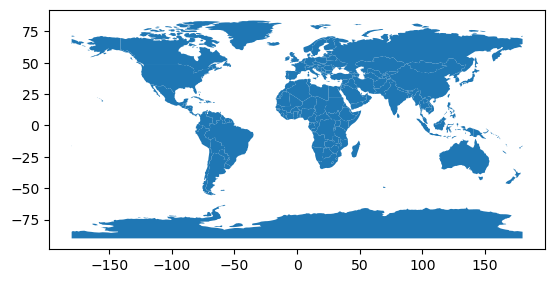

In [13]:
world.plot()
plt.show()

In [14]:
print(gpd.__version__)

0.10.2


In [10]:
!pip list

Traceback (most recent call last):
  File "/home/jtl/anaconda3/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/home/jtl/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 8, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/jtl/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/jtl/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/jtl/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 22, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/home/jtl/anaconda3/lib/python3.7/site-packages/pip/_internal/cli/progress_bars.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/home/jtl/an

In [5]:
# concat
greater_boston_shp = pd.concat([ma_shp, nh_shp], axis = 0)

In [12]:
ma_shp.geometry # We cannot plot?!!!!

0       POLYGON ((-72.53466 42.45847, -72.53426 42.459...
1       POLYGON ((-71.10947 42.35836, -71.10881 42.359...
2       POLYGON ((-71.21182 42.30064, -71.21177 42.300...
3       POLYGON ((-71.23649 42.36083, -71.23626 42.360...
4       POLYGON ((-71.12547 42.41469, -71.12518 42.415...
                              ...                        
4980    POLYGON ((-72.63898 42.32747, -72.63847 42.327...
4981    POLYGON ((-72.65573 42.31895, -72.65569 42.319...
4982    POLYGON ((-71.77701 42.30069, -71.77698 42.300...
4983    POLYGON ((-73.34032 42.06950, -73.34018 42.069...
4984    POLYGON ((-71.78563 42.30372, -71.78547 42.303...
Name: geometry, Length: 4985, dtype: geometry

In [7]:
greater_boston_shp.

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,25,011,040600,1,250110406001,Block Group 1,G5030,S,59026773,425598,+42.4688984,-072.4845789,"POLYGON ((-72.53466 42.45847, -72.53426 42.459..."
1,25,017,353200,2,250173532002,Block Group 2,G5030,S,150628,0,+42.3578012,-071.1054228,"POLYGON ((-71.10947 42.35836, -71.10881 42.359..."
2,25,017,374000,2,250173740002,Block Group 2,G5030,S,3766652,158983,+42.2996098,-071.1993691,"POLYGON ((-71.21182 42.30064, -71.21177 42.300..."
3,25,017,374600,4,250173746004,Block Group 4,G5030,S,286764,0,+42.3606516,-071.2301072,"POLYGON ((-71.23649 42.36083, -71.23626 42.360..."
4,25,017,339400,3,250173394003,Block Group 3,G5030,S,110764,0,+42.4138334,-071.1229358,"POLYGON ((-71.12547 42.41469, -71.12518 42.415..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,33,011,000902,2,330110009022,Block Group 2,G5030,S,1753674,0,+43.0024066,-071.4123776,"POLYGON ((-71.42907 42.99965, -71.42735 43.000..."
918,33,011,000902,3,330110009023,Block Group 3,G5030,S,1975896,0,+43.0088754,-071.4272036,"POLYGON ((-71.43984 43.01824, -71.43945 43.018..."
919,33,001,966401,1,330019664011,Block Group 1,G5030,S,13390141,37862182,+43.6110999,-071.3675435,"POLYGON ((-71.45154 43.61814, -71.45054 43.618..."
920,33,013,044300,2,330130443002,Block Group 2,G5030,S,2002026,0,+43.2562059,-071.6039810,"POLYGON ((-71.62258 43.25824, -71.62253 43.258..."


In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [17]:
world #??!!!

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [16]:
world.plot()

<AxesSubplot:>